In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
IP = pd.read_csv('/content/drive/My Drive/UNP PROJECT/Insurance Premium.csv')

In [ ]:
IP

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
IP.columns = IP.columns.str.title()
IP.rename(columns={'Bmi': 'BMI'}, inplace=True)

In [ ]:
IP

,Age,Sex,BMI,Children,Smoker,Region,Charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
IP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1338 non-null   int64  
 1   Sex       1338 non-null   object 
 2   BMI       1338 non-null   float64
 3   Children  1338 non-null   int64  
 4   Smoker    1338 non-null   object 
 5   Region    1338 non-null   object 
 6   Charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
IP.describe()

,Age,BMI,Children,Charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
IP.isnull().sum()

,0
Age,0
Sex,0
BMI,0
Children,0
Smoker,0
Region,0
Charges,0


In [ ]:
IP.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1333,False
1334,False
1335,False
1336,False


In [ ]:
IP['Region'].value_counts()

,count
Region,
southeast,364
southwest,325
northwest,325
northeast,324


In [ ]:
IP['Children'].value_counts()

,count
Children,
0,574
1,324
2,240
3,157
4,25
5,18


In [ ]:
# Identify categorical columns by their data types
IP.select_dtypes(include=['object', 'category']).columns

Index(['Sex', 'Smoker', 'Region'], dtype='object')

In [ ]:
#Finding out what are the categories in each column
print(IP['Sex'].value_counts())
print(IP['Smoker'].value_counts())
print(IP['Region'].value_counts())

Sex
male      676
female    662
Name: count, dtype: int64
Smoker
no     1064
yes     274
Name: count, dtype: int64
Region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


In [ ]:
#Converting Categorical columns to Numerical - PART -1
change = {'Sex':{'male':0,'female':1},'Smoker':{'no':0,'yes':1}}
IP.replace(change, inplace=True)
IP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1338 non-null   int64  
 1   Sex       1338 non-null   int64  
 2   BMI       1338 non-null   float64
 3   Children  1338 non-null   int64  
 4   Smoker    1338 non-null   int64  
 5   Region    1338 non-null   object 
 6   Charges   1338 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 73.3+ KB


<ipython-input-15-cafbc4eba43c>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  IP.replace(change, inplace=True)


In [ ]:
#Converting Categorical columns to Numerical - PART -2
IP = pd.get_dummies(IP, columns=['Region'])
IP = IP.astype(int)
print(IP)

      Age  Sex  BMI  Children  Smoker  Charges  Region_northeast  \
0      19    1   27         0       1    16884                 0   
1      18    0   33         1       0     1725                 0   
2      28    0   33         3       0     4449                 0   
3      33    0   22         0       0    21984                 0   
4      32    0   28         0       0     3866                 0   
...   ...  ...  ...       ...     ...      ...               ...   
1333   50    0   30         3       0    10600                 0   
1334   18    1   31         0       0     2205                 1   
1335   18    1   36         0       0     1629                 0   
1336   21    1   25         0       0     2007                 0   
1337   61    1   29         0       1    29141                 0   

      Region_northwest  Region_southeast  Region_southwest  
0                    0                 0                 1  
1                    0                 1                 0  


In [ ]:
IP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               1338 non-null   int64
 1   Sex               1338 non-null   int64
 2   BMI               1338 non-null   int64
 3   Children          1338 non-null   int64
 4   Smoker            1338 non-null   int64
 5   Charges           1338 non-null   int64
 6   Region_northeast  1338 non-null   int64
 7   Region_northwest  1338 non-null   int64
 8   Region_southeast  1338 non-null   int64
 9   Region_southwest  1338 non-null   int64
dtypes: int64(10)
memory usage: 104.7 KB


In [ ]:
IP.corr()

,Age,Sex,BMI,Children,Smoker,Charges,Region_northeast,Region_northwest,Region_southeast,Region_southwest
Age,1.000000,0.020856,0.108437,0.042469,-0.025019,0.299009,0.002475,-0.000407,-0.011642,0.010016
Sex,0.020856,1.000000,-0.046503,-0.017163,-0.076185,-0.057293,0.002425,0.011156,-0.017117,0.004184
BMI,0.108437,-0.046503,1.000000,0.011097,0.001669,0.196188,-0.138877,-0.138495,0.271303,-0.004313
Children,0.042469,-0.017163,0.011097,1.000000,0.007673,0.067999,-0.022808,0.024806,-0.023066,0.021914
Smoker,-0.025019,-0.076185,0.001669,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
Charges,0.299009,-0.057293,0.196188,0.067999,0.787251,1.000000,0.006350,-0.039905,0.073981,-0.043210
Region_northeast,0.002475,0.002425,-0.138877,-0.022808,0.002811,0.006350,1.000000,-0.320177,-0.345561,-0.320177
Region_northwest,-0.000407,0.011156,-0.138495,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
Region_southeast,-0.011642,-0.017117,0.271303,-0.023066,0.068498,0.073981,-0.345561,-0.346265,1.000000,-0.346265
Region_southwest,0.010016,0.004184,-0.004313,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


<Axes: >

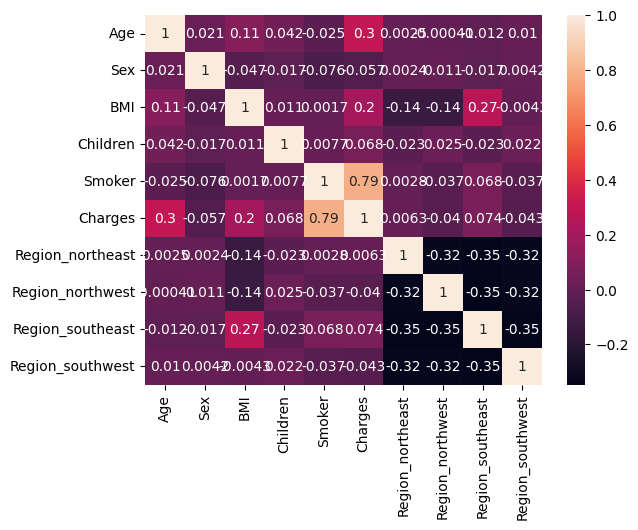

In [ ]:
sns.heatmap(IP.corr(),annot=True)

In [ ]:
#This is the ranking of Correlation of the fields
#Smoker: 0.787251
#Age: 0.299008
#BMI: 0.198341
#Children: 0.067998
#Region: 0.011741
#Sex: -0.057292
#We can see that smoker, age and bmi affect charges more than children, region, sex.

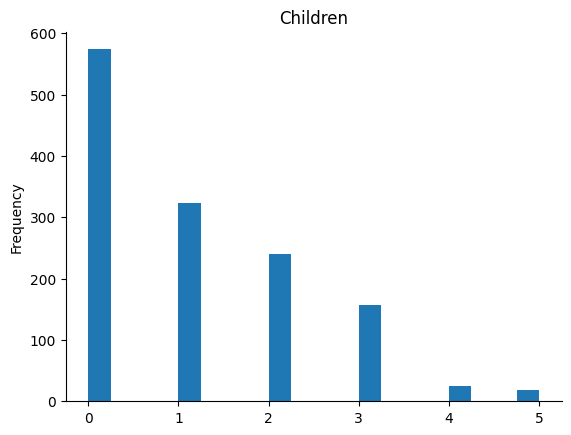

In [ ]:
IP['Children'].plot(kind='hist', bins=20, title='Children')
plt.gca().spines[['top', 'right',]].set_visible(False)

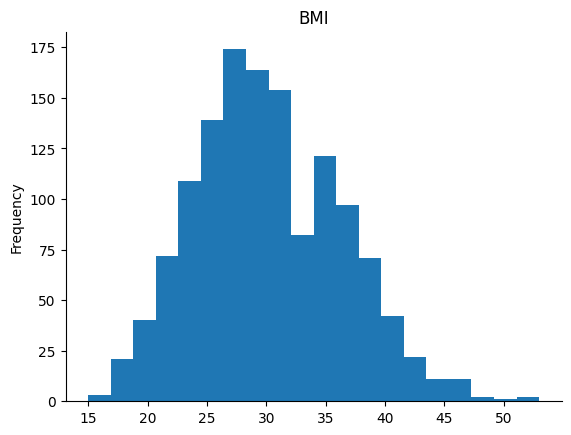

In [ ]:
IP['BMI'].plot(kind='hist', bins=20, title='BMI')
plt.gca().spines[['top', 'right',]].set_visible(False)

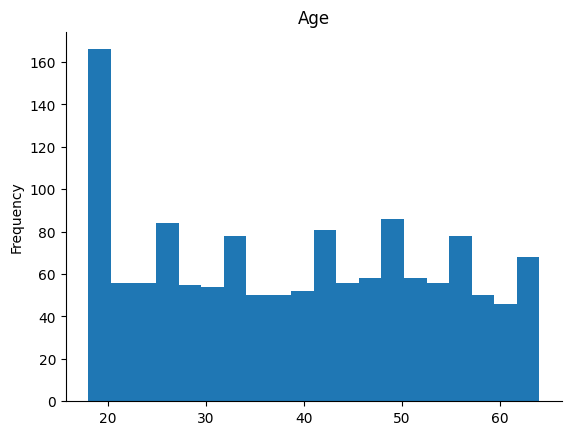

In [ ]:
IP['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

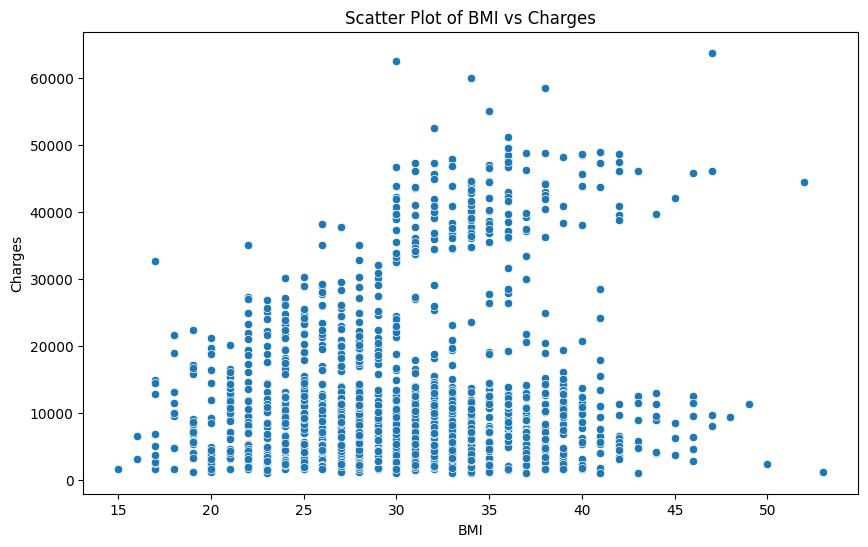

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BMI', y='Charges', data=IP)
plt.title('Scatter Plot of BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

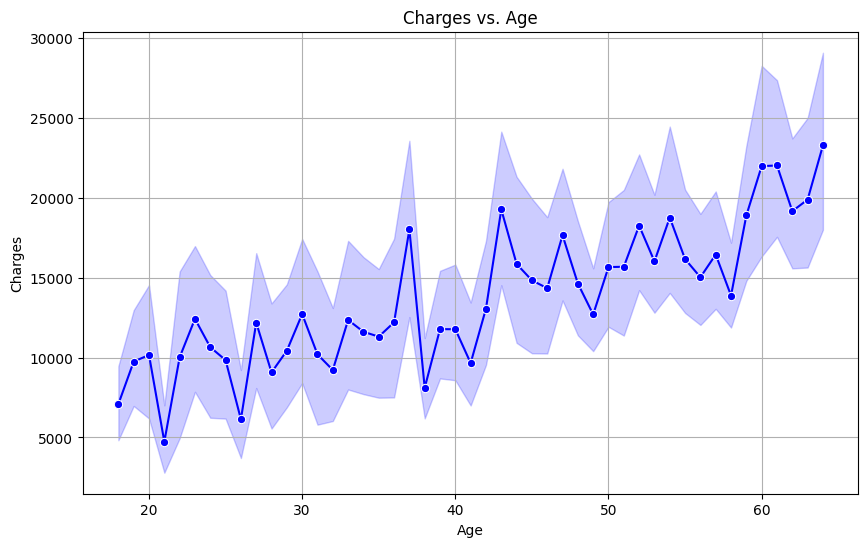

In [ ]:
# Line Chart of Charges vs. Age
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='Charges', data=IP, marker='o', color='blue')
plt.title('Charges vs. Age')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.grid(True)
plt.show()

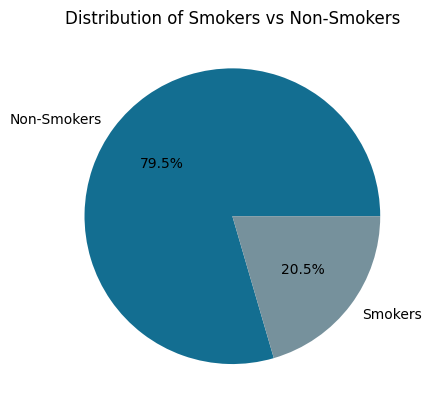

In [ ]:
#Assuming you have a column 'Smoker' where 0 = No and 1 = Yes
smoker_counts = IP['Smoker'].value_counts()
labels = ['Non-Smokers', 'Smokers']
plt.pie(smoker_counts, labels=labels, autopct='%1.1f%%', colors=['#136e91', '#76919c'])
plt.title('Distribution of Smokers vs Non-Smokers')
plt.show()

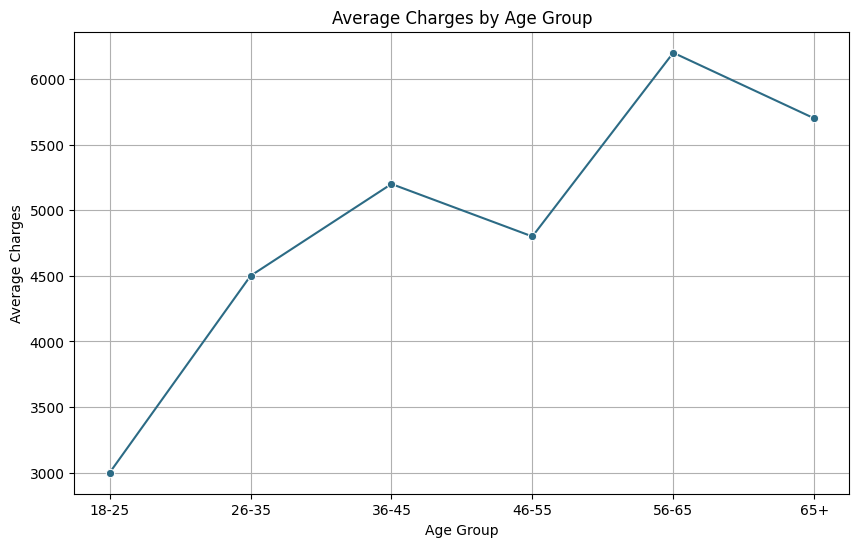

In [ ]:
# Assuming 'age_group_charges' is a pandas DataFrame containing 'age_group' and 'charges'
# Here's an example of how it might be structured:
age_group_charges = pd.DataFrame({
    'age_group': ['18-25', '26-35', '36-45', '46-55', '56-65', '65+'],
    'charges': [3000, 4500, 5200, 4800, 6200, 5700]
})

# Creating the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='age_group', y='charges', data=age_group_charges, marker='o', color='#2c6b85')
plt.title('Average Charges by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Charges')
plt.grid(True)
plt.show()

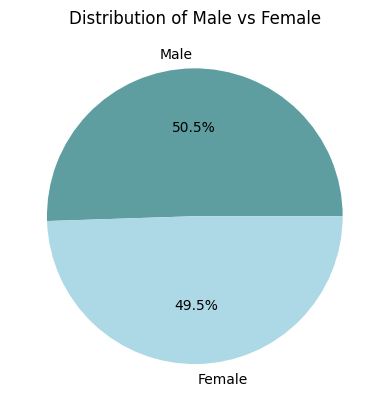

In [ ]:
sex_counts = IP['Sex'].value_counts()
labels = ['Male', 'Female']
plt.pie(sex_counts, labels=labels, autopct='%1.1f%%', colors=['cadetblue', 'lightblue'])
plt.title('Distribution of Male vs Female')
plt.show()

In [ ]:
from scipy import stats
smokers = IP[IP['Smoker'] == 'yes']['Charges']
non_smokers = IP[IP['Smoker'] == 'no']['Charges']
stats.ttest_ind(smokers, non_smokers)

TtestResult(statistic=nan, pvalue=nan, df=nan)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


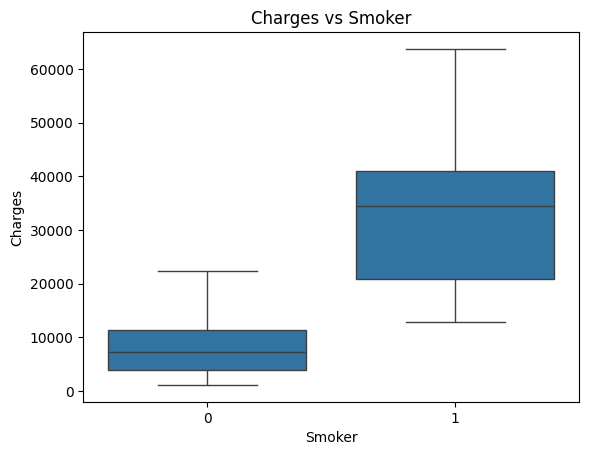

In [ ]:
sns.boxplot(x='Smoker', y='Charges', data=IP, showfliers=False)
plt.title('Charges vs Smoker')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


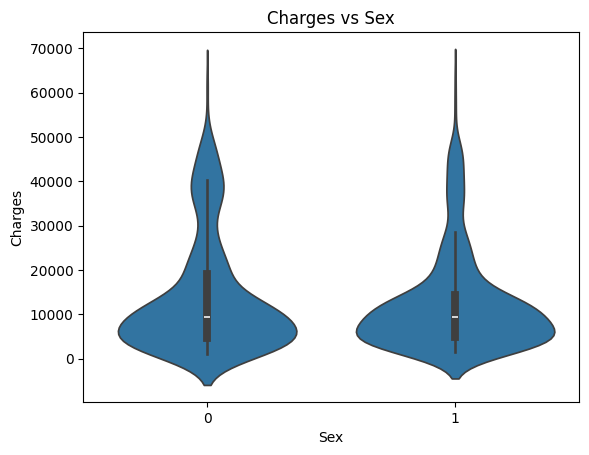

In [ ]:
sns.violinplot(x='Sex', y='Charges', data=IP)
plt.title('Charges vs Sex')
plt.show()

In [ ]:
IP['Region'] = IP[['Region_northeast', 'Region_northwest', 'Region_southeast', 'Region_southwest']].idxmax(axis=1)
IP['Region'] = IP['Region'].str.replace('Region_', '')
print(IP[['Region', 'Charges']].head())

      Region  Charges
0  southwest    16884
1  southeast     1725
2  southeast     4449
3  northwest    21984
4  northwest     3866


In [ ]:
IP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1338 non-null   int64 
 1   Sex               1338 non-null   int64 
 2   BMI               1338 non-null   int64 
 3   Children          1338 non-null   int64 
 4   Smoker            1338 non-null   int64 
 5   Charges           1338 non-null   int64 
 6   Region_northeast  1338 non-null   int64 
 7   Region_northwest  1338 non-null   int64 
 8   Region_southeast  1338 non-null   int64 
 9   Region_southwest  1338 non-null   int64 
 10  Region            1338 non-null   object
dtypes: int64(10), object(1)
memory usage: 115.1+ KB


In [ ]:
print(IP.columns)

Index(['Age', 'Sex', 'BMI', 'Children', 'Smoker', 'Charges',
       'Region_northeast', 'Region_northwest', 'Region_southeast',
       'Region_southwest', 'Region'],
      dtype='object')


<ipython-input-35-d6c91564e5cc>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Region', y='Charges', hue='Smoker', data=IP, estimator=np.mean, ci=None)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


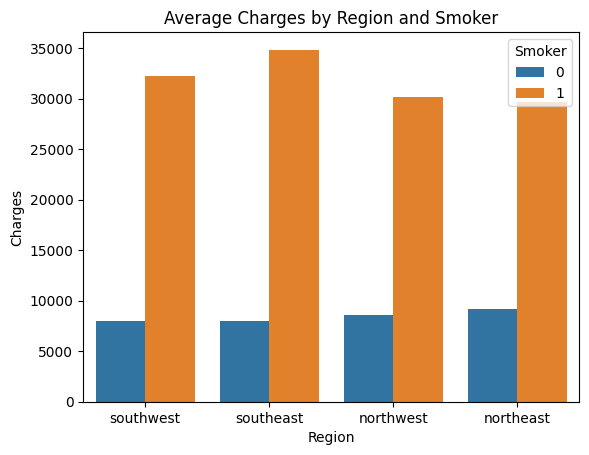

In [ ]:
# Bar plot: Charges by Region and Smoker (without error bars)
sns.barplot(x='Region', y='Charges', hue='Smoker', data=IP, estimator=np.mean, ci=None)
plt.title('Average Charges by Region and Smoker')
plt.show()

<ipython-input-36-6ee05aba0279>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sex', y='Charges', hue='Smoker', data=IP, estimator=np.mean, ci=None)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


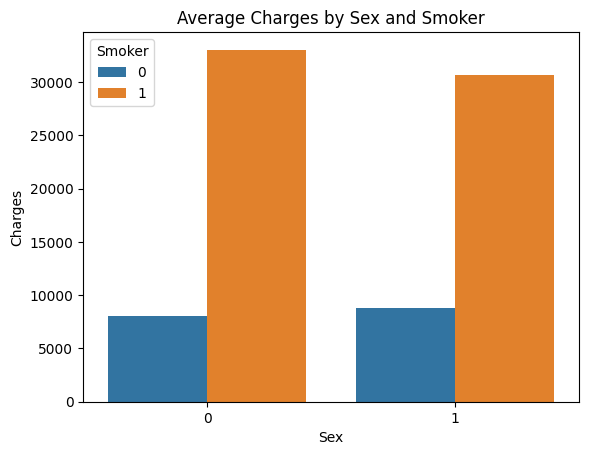

In [ ]:
# Bar plot: Charges by Sex and Smoker (without error bars)
sns.barplot(x='Sex', y='Charges', hue='Smoker', data=IP, estimator=np.mean, ci=None)
plt.title('Average Charges by Sex and Smoker')
plt.show()

<ipython-input-37-5ee64a30f235>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='BMI_Category', y='Charges', data=IP, estimator=np.mean, ci=None)


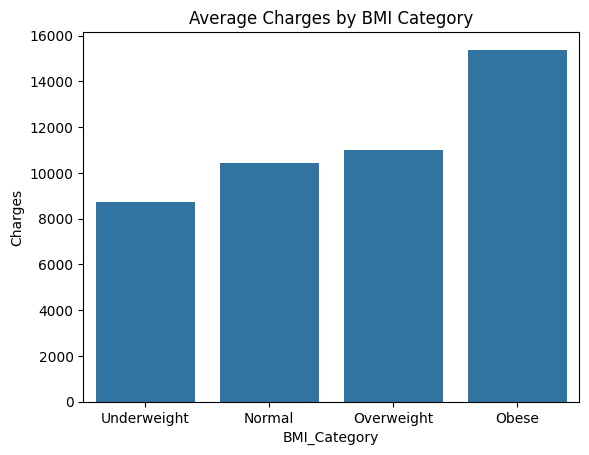

In [ ]:
# Define BMI categories
bins = [0, 18.5, 24.9, 29.9, 40]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
IP['BMI_Category'] = pd.cut(IP['BMI'], bins=bins, labels=labels)

# Bar plot: Average Charges by BMI Category
sns.barplot(x='BMI_Category', y='Charges', data=IP, estimator=np.mean, ci=None)
plt.title('Average Charges by BMI Category')
plt.show()

<ipython-input-38-743001ba6389>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Region', y='Charges', data=IP, ci=None)


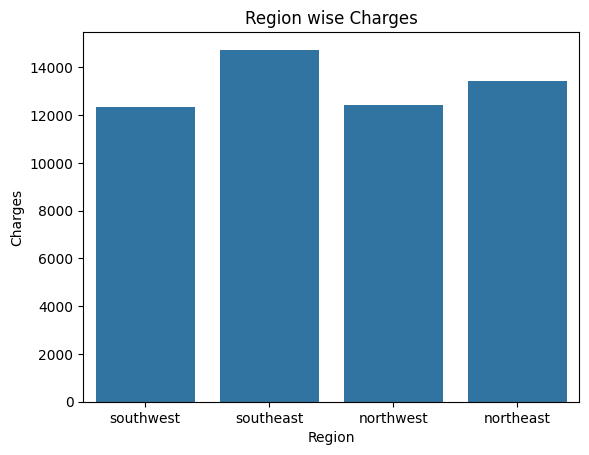

In [ ]:
sns.barplot(x='Region', y='Charges', data=IP, ci=None)
plt.title("Region wise Charges")
plt.show()

In [ ]:
IP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Age               1338 non-null   int64   
 1   Sex               1338 non-null   int64   
 2   BMI               1338 non-null   int64   
 3   Children          1338 non-null   int64   
 4   Smoker            1338 non-null   int64   
 5   Charges           1338 non-null   int64   
 6   Region_northeast  1338 non-null   int64   
 7   Region_northwest  1338 non-null   int64   
 8   Region_southeast  1338 non-null   int64   
 9   Region_southwest  1338 non-null   int64   
 10  Region            1338 non-null   object  
 11  BMI_Category      1270 non-null   category
dtypes: category(1), int64(10), object(1)
memory usage: 116.6+ KB


# **Linear** **Regression**

In [ ]:
IP=IP.drop('Region', axis=1)

In [ ]:
# Drop 'BMI_Category' column
IP = IP.drop('BMI_Category', axis=1)

In [ ]:
IP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               1338 non-null   int64
 1   Sex               1338 non-null   int64
 2   BMI               1338 non-null   int64
 3   Children          1338 non-null   int64
 4   Smoker            1338 non-null   int64
 5   Charges           1338 non-null   int64
 6   Region_northeast  1338 non-null   int64
 7   Region_northwest  1338 non-null   int64
 8   Region_southeast  1338 non-null   int64
 9   Region_southwest  1338 non-null   int64
dtypes: int64(10)
memory usage: 104.7 KB


In [ ]:
#FITTING SIMPLE LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
# Define the features (X) and target (y)
X = IP[['Smoker']]
y = IP['Charges']

In [ ]:
#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 52745677.021999925
Mean Absolute Error: 5625.803397717295
R^2 Score: 0.6602498255268917


In [ ]:
# Print the coefficients
print("Slope:", model.coef_[0])
print("Intercept:", model.intercept_)

Slope: 23188.667058823532
Intercept: 8577.832941176472


# **Logistic Regression**

In [ ]:
IP2 = IP.copy()

charges_med = IP2['Charges'].median()
IP2['catCharges'] = [1 if x > charges_med else 0 for x in IP2['Charges']]

IP2['catCharges'].value_counts(normalize = True)
IP2 = IP2.drop('Charges', axis=1)

In [ ]:
IP2

,Age,Sex,BMI,Children,Smoker,Region_northeast,Region_northwest,Region_southeast,Region_southwest,catCharges
0,19,1,27,0,1,0,0,0,1,1
1,18,0,33,1,0,0,0,1,0,0
2,28,0,33,3,0,0,0,1,0,0
3,33,0,22,0,0,0,1,0,0,1
4,32,0,28,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,0,1,0,0,1
1334,18,1,31,0,0,1,0,0,0,0
1335,18,1,36,0,0,0,0,1,0,0
1336,21,1,25,0,0,0,0,0,1,0


In [ ]:
IP2.describe()

,Age,Sex,BMI,Children,Smoker,Region_northeast,Region_northwest,Region_southeast,Region_southwest,catCharges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.169656,1.094918,0.204783,0.242152,0.242900,0.272048,0.242900,0.500000
std,14.049960,0.500160,6.119875,1.205493,0.403694,0.428546,0.428995,0.445181,0.428995,0.500187
min,18.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,0.000000,30.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,51.000000,1.000000,34.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,64.000000,1.000000,53.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [ ]:
# Split features and target
X = IP2.drop('catCharges', axis=1)  # Features (all columns except target)
y = IP2['catCharges']               # Target (binary classification: 0 or 1)

In [ ]:
IP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               1338 non-null   int64
 1   Sex               1338 non-null   int64
 2   BMI               1338 non-null   int64
 3   Children          1338 non-null   int64
 4   Smoker            1338 non-null   int64
 5   Charges           1338 non-null   int64
 6   Region_northeast  1338 non-null   int64
 7   Region_northwest  1338 non-null   int64
 8   Region_southeast  1338 non-null   int64
 9   Region_southwest  1338 non-null   int64
dtypes: int64(10)
memory usage: 104.7 KB


In [ ]:
 # 3. Train-Test Split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
model.coef_

array([[ 0.14765625,  0.27209862,  0.03234499,  0.05837092,  6.09747647,
         0.34090707,  0.04487608, -0.16933777, -0.38915628]])

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1])

In [ ]:
model = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
model

,Predicted,Actual
764,1,0
887,0,0
890,1,1
1293,0,0
259,1,1
...,...,...
109,1,1
575,1,1
535,0,0
543,1,1


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9067164179104478

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[130,  16],
       [  9, 113]])

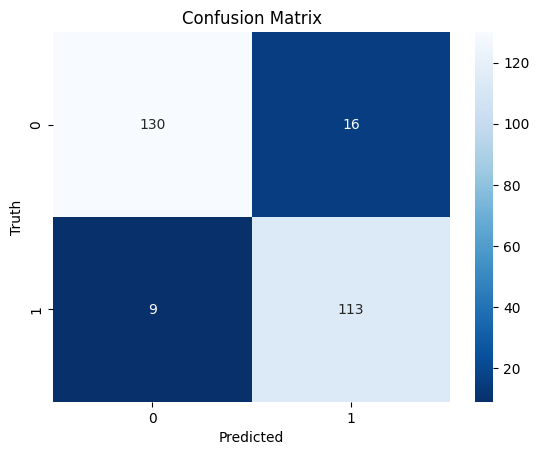

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues_r")
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
# binary, multiclass

from sklearn.metrics import classification_report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       146
           1       0.88      0.93      0.90       122

    accuracy                           0.91       268
   macro avg       0.91      0.91      0.91       268
weighted avg       0.91      0.91      0.91       268



In [ ]:
from sklearn.model_selection import train_test_split

# Assuming X is your feature set and y is your target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
model.coef_

array([[ 0.15420712,  0.35507525,  0.0274388 ,  0.09884323,  6.44569734,
        -0.38123996, -0.50676622, -0.79685566, -0.99017989]])

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,

In [ ]:
model = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
model

,Predicted,Actual
764,1,0
887,0,0
890,1,1
1293,1,0
259,1,1
...,...,...
342,1,1
308,1,1
1128,0,1
503,1,1


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8776119402985074

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[147,  25],
       [ 16, 147]])

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming X is your feature set and y is your target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
model.coef_

array([[ 0.14828176,  0.22144178,  0.03165258,  0.01149834,  6.04377071,
         0.30267722,  0.09678097, -0.18379509, -0.40019506]])

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,

In [ ]:
model = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
model

,Predicted,Actual
764,1,0
887,0,0
890,1,1
1293,0,0
259,1,1
...,...,...
701,1,1
672,0,0
1163,0,0
1103,1,1


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8980099502487562

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming X is your feature set and y is your target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)


In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
model.coef_

array([[ 1.48331306e-01,  2.40345416e-01,  4.04720123e-02,
         4.39474366e-03,  6.05614261e+00,  4.35481872e-01,
         1.34785500e-01, -1.78939290e-01, -3.83095646e-01]])

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,

In [ ]:
model = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
model

,Predicted,Actual
764,1,0
887,0,0
890,1,1
1293,0,0
259,1,1
...,...,...
847,0,0
1277,0,0
986,0,0
922,0,0


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8997867803837953

# **Multiple** **Linear** **Regression**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
IP.columns

Index(['Age', 'Sex', 'BMI', 'Children', 'Smoker', 'Charges',
       'Region_northeast', 'Region_northwest', 'Region_southeast',
       'Region_southwest'],
      dtype='object')

In [ ]:
IP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               1338 non-null   int64
 1   Sex               1338 non-null   int64
 2   BMI               1338 non-null   int64
 3   Children          1338 non-null   int64
 4   Smoker            1338 non-null   int64
 5   Charges           1338 non-null   int64
 6   Region_northeast  1338 non-null   int64
 7   Region_northwest  1338 non-null   int64
 8   Region_southeast  1338 non-null   int64
 9   Region_southwest  1338 non-null   int64
dtypes: int64(10)
memory usage: 104.7 KB


In [ ]:
print(IP.columns)

Index(['Age', 'Sex', 'BMI', 'Children', 'Smoker', 'Charges',
       'Region_northeast', 'Region_northwest', 'Region_southeast',
       'Region_southwest'],
      dtype='object')


In [ ]:
# Define independent and dependent variables
X = IP[['Smoker','Age','BMI']]
y = IP['Charges']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Coefficients and intercept
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')

Mean Squared Error: 34497102.70928782
Coefficients: [23679.62327289   259.56466485   324.52167046]
Intercept: -11496.893936041524


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7777941752570782

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_pred)

4257.646046100365

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

34497102.70928782
4257.646046100365
5873.423423293081


# **KNN Regressor**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 46)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
model=KNeighborsRegressor(n_neighbors=4)

In [ ]:
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([18925.75,  9048.25, 14364.  ,  5235.75, 10451.5 ,  9979.5 ,
       24288.75,  2624.  ,  3255.75,  4620.  , 20894.  ,  1754.5 ,
        3960.5 ,  7725.75, 18379.75,  2313.  ,  7097.  ,  5098.75,
        8815.  , 15642.5 ,  3466.5 ,  6795.25,  1912.75, 14381.  ,
       13970.25, 27172.75, 10265.5 , 25680.5 , 10493.25, 11973.  ,
       17422.75,  9673.5 , 11123.25, 26302.25,  2313.  ,  8271.25,
       17261.5 , 14739.  , 12694.5 ,  4194.  , 13510.25,  9077.75,
       13128.5 ,  2714.5 ,  4205.5 , 12956.75,  4137.25, 25156.25,
       10016.5 ,  7893.25,  6416.75, 13464.5 ,  6240.75, 30874.75,
       14551.  , 16273.5 , 14019.5 ,  5565.25,  7240.5 , 16785.5 ,
        8236.5 , 19734.5 , 22883.  , 10249.5 , 24937.25, 14244.25,
       13350.75,  6136.  , 17845.5 , 11818.25, 22900.  , 21790.75,
        3255.75, 16085.5 ,  7369.  , 27681.75, 10197.5 , 17229.5 ,
        9856.  ,  7189.5 , 20690.75, 16085.5 ,  5322.75,  7779.  ,
        4595.75, 18067.75,  8919.25, 17908.  , 19611.75,  7586

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
knn

,Predicted,Actual
141,18925.75,3490
1065,9048.25,7045
467,14364.00,12643
557,5235.75,3935
166,10451.50,4830
...,...,...
1270,3554.00,3292
558,13541.75,39983
402,30626.50,14692
568,8662.50,11552


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.2109698057613395

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_pred)

6965.70895522388

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(rmse)

107572763.57587065
10371.729054302887


# **KNN** **Classifier**

In [ ]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=25) # Can decide the number of neighbours by root(size of data)

In [ ]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0])

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
knn

,Predicted,Actual
764,0,0
887,0,0
890,1,1
1293,0,0
259,1,1
...,...,...
109,1,1
575,0,1
535,0,0
543,1,1


In [ ]:
accuracy_score(y_test,y_pred)

0.746268656716418

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[146,   0],
       [ 68,  54]])

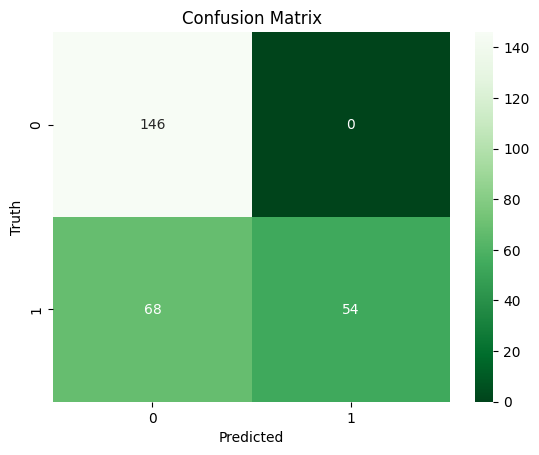

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens_r")
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.68      1.00      0.81       146
           1       1.00      0.44      0.61       122

    accuracy                           0.75       268
   macro avg       0.84      0.72      0.71       268
weighted avg       0.83      0.75      0.72       268



In [ ]:
from sklearn.model_selection import train_test_split

# Assuming X is your feature set and y is your target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=23)

In [ ]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=23)

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,

In [ ]:
accuracy_score(y_test,y_pred)

0.7164179104477612

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[172,   0],
       [ 95,  68]])

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming X is your feature set and y is your target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=27)

In [ ]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=27)

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,

In [ ]:
accuracy_score(y_test,y_pred)

0.7078891257995735

# **DecisionTree Regreesor**

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
# Define your feature variables (X) and target variable (y)
# Replace 'feature_columns' and 'target_column' with your actual column names
X = IP2[['Smoker', 'BMI', 'Age']]  # Add relevant features
y = IP2['catCharges']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

In [ ]:
 #Train the model on the training data
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
# Make predictions on the test data
y_pred = dt_regressor.predict(X_test)

In [ ]:
# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
# Optional: print feature importance
print(f"Feature Importances: {dt_regressor.feature_importances_}")

Mean Squared Error: 0.1394827943615257
Feature Importances: [0.41035439 0.11979794 0.46984766]


In [ ]:
r2_score(y_test,y_pred)

0.4375582628440253

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_pred)

0.1570273631840796

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(rmse)

0.1394827943615257
0.37347395406042133


# **DecisionTree Classifier**

In [ ]:
# Define independent variables (excluding the target 'catCharges')
X = IP2[['Smoker']]

# Define dependent variable (target)
y = IP2['catCharges']

In [ ]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

In [ ]:
# Train the model on the training data
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Make predictions on the test data
y_pred = dt_classifier.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0])

In [ ]:
#Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 74.63%


In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[146,   0],
       [ 68,  54]])

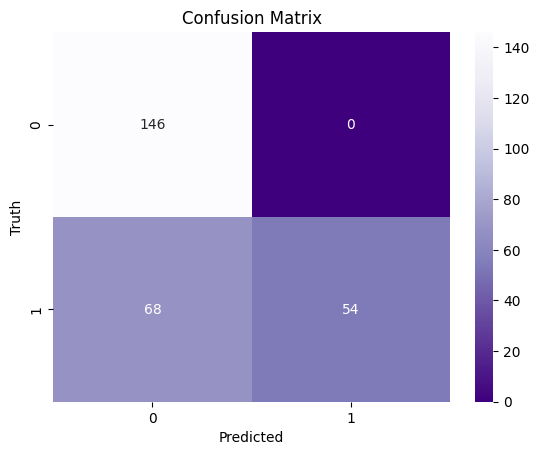

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples_r")
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.68      1.00      0.81       146
           1       1.00      0.44      0.61       122

    accuracy                           0.75       268
   macro avg       0.84      0.72      0.71       268
weighted avg       0.83      0.75      0.72       268



In [ ]:
from sklearn.model_selection import train_test_split

# Assuming X is your feature set and y is your target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

In [ ]:
# Train the model on the training data
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Make predictions on the test data
y_pred = dt_classifier.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,

In [ ]:
#Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 71.64%


In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[172,   0],
       [ 95,  68]])

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming X is your feature set and y is your target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

In [ ]:
# Train the model on the training data
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Make predictions on the test data
y_pred = dt_classifier.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,

In [ ]:
#Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 70.79%


In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[240,   0],
       [137,  92]])

# **RandomForest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Define your feature variables (X) and target variable (y)
# Replace 'feature_columns' and 'target_column' with your actual column names
X = IP[['Smoker', 'BMI', 'Age']]  # Add relevant features
y = IP['Charges']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = rf_regressor.predict(X_test)
y_pred

array([ 9613.04309524,  5481.61309524, 28466.19      , 10173.394     ,
       34503.21866667,  6157.74142857,  1786.03416667, 14498.08618182,
        4615.25      ,  9736.34833333, 17753.80333333,  8205.55088095,
       12747.28818182, 46074.325     , 48580.52      , 44988.45      ,
        9815.199     , 42046.60833333,  9546.03916667, 29597.0887381 ,
        5389.3425    ,  8420.73833333,  9405.18864286,  2419.76583333,
       10902.54266667, 11681.388     , 14839.646     ,  7524.72061905,
       10294.76766667,  6898.48763456,  6407.05759921, 11639.7892619 ,
        2899.80052381,  4995.33      ,  4974.6824881 ,  9203.45      ,
        2165.085     , 16020.14033333, 24404.51      , 39978.77533333,
        1956.61616667,  3560.10458333, 12001.42757143, 14417.78066667,
        5470.07      , 13116.6027619 , 10523.09785714, 15974.64      ,
       41575.95      ,  8698.39953571, 14888.594     ,  5167.08383333,
        5972.034     ,  1922.10869048, 12131.58609524,  9330.905     ,
      

In [ ]:
# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
# Optional: print feature importance
print(f"Feature Importances: {dt_regressor.feature_importances_}")

Mean Squared Error: 26739805.295361497
Feature Importances: [0.41035439 0.11979794 0.46984766]


In [ ]:
r2_score(y_test,y_pred)

0.8277611734761359

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_pred)

2898.2781831238826

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(rmse)
print(mae)

26739805.295361497
5171.054563177757
2898.2781831238826


# **RandomForest Classifier**


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Define independent variables (excluding the target 'catCharges')
X = IP2[['Smoker']]

# Define dependent variable (target)
y = IP2['catCharges']

In [ ]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_classifier.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0])

In [ ]:
#Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 74.63%


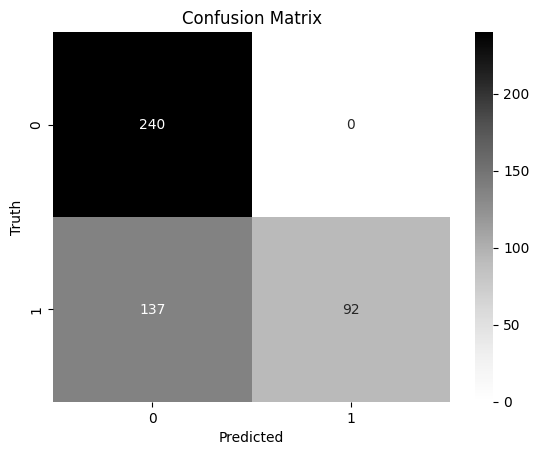

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Greys")
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.68      1.00      0.81       146
           1       1.00      0.44      0.61       122

    accuracy                           0.75       268
   macro avg       0.84      0.72      0.71       268
weighted avg       0.83      0.75      0.72       268



In [ ]:
from sklearn.model_selection import train_test_split

# Assuming X is your feature set and y is your target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# Train the model on the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy (75/25 split): {accuracy * 100:.2f}%')

Accuracy (75/25 split): 71.64%


In [ ]:
# Display a detailed classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78       172
           1       1.00      0.42      0.59       163

    accuracy                           0.72       335
   macro avg       0.82      0.71      0.69       335
weighted avg       0.82      0.72      0.69       335



In [ ]:
from sklearn.model_selection import train_test_split

# Assuming X is your feature set and y is your target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [ ]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# Train the model on the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy (65/35 split): {accuracy * 100:.2f}%')

Accuracy (65/35 split): 70.79%


In [ ]:
# Display a detailed classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78       240
           1       1.00      0.40      0.57       229

    accuracy                           0.71       469
   macro avg       0.82      0.70      0.68       469
weighted avg       0.81      0.71      0.68       469

